<a href="https://www.kaggle.com/code/krishnaprasad2608/market-basket-analysis?scriptVersionId=171438256" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

**Market Basket Analysis** is a data mining technique used to identify associations between products purchased by customers. It analyzes customer purchase behavior to uncover patterns of co-occurring items in transactions. The primary goal is to understand which items tend to be bought together and to what extent.

In retail and e-commerce, Market Basket Analysis holds significant importance for several reasons:

* **Cross-Selling Opportunities:** By identifying which items are frequently bought together, retailers can strategically place these items near each other to encourage cross-selling. For example, if customers often buy bread and butter together, placing them in close proximity in the store can increase sales of both items.

* **Customer Segmentation:** Understanding purchasing patterns can help segment customers based on their buying behavior. Retailers can tailor marketing strategies and promotions to different segments to improve customer satisfaction and loyalty.

* **Inventory Management:** Market Basket Analysis can inform inventory management decisions by highlighting items that are frequently purchased together. Retailers can adjust stocking levels and procurement strategies accordingly to optimize inventory turnover and minimize stockouts.

* **Personalized Recommendations:** E-commerce platforms can use Market Basket Analysis to provide personalized product recommendations to customers based on their past purchases. This enhances the customer shopping experience and increases the likelihood of repeat purchases.

# Objectives

The objective of the project is to conduct a Market Basket Analysis to:

* Identify which items are frequently purchased together by customers.
* Determine the strength of associations between items using metrics such as support, confidence, and lift.
* Provide insights that can be utilized for product placement, cross-selling strategies, and marketing initiatives to enhance sales and customer satisfaction.

# Variables Description

* **BillNo:** BillNo serves as a unique identifier for each customer transaction within the dataset.
* **Itemname:** Itemname denotes the specific name of the product purchased in a transaction.
* **Quantity:** Quantity represents the number of units of a product bought in a single transaction.
* **Price:** Price indicates the cost of each individual item purchased.
* **CustomerID:** CustomerID is a unique identifier assigned to each customer for tracking purchasing behavior.

# Exploratory Data Analysis

In [1]:
# For data manipulation and analysis
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
transaction_data = pd.read_csv("/kaggle/input/market-basket-dataset/market_basket_dataset.csv")

In [3]:
# Display the first few rows of the dataset
transaction_data.head(5)

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [4]:
# Display the data types of each column
transaction_data.dtypes

BillNo          int64
Itemname       object
Quantity        int64
Price         float64
CustomerID      int64
dtype: object

In [5]:
# Checking the shape of the dataset
transaction_data.shape

(500, 5)

In [6]:
# Checking for any missing values

transaction_data.isnull().sum()


BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [7]:
# Summary of numerical columns
transaction_data.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


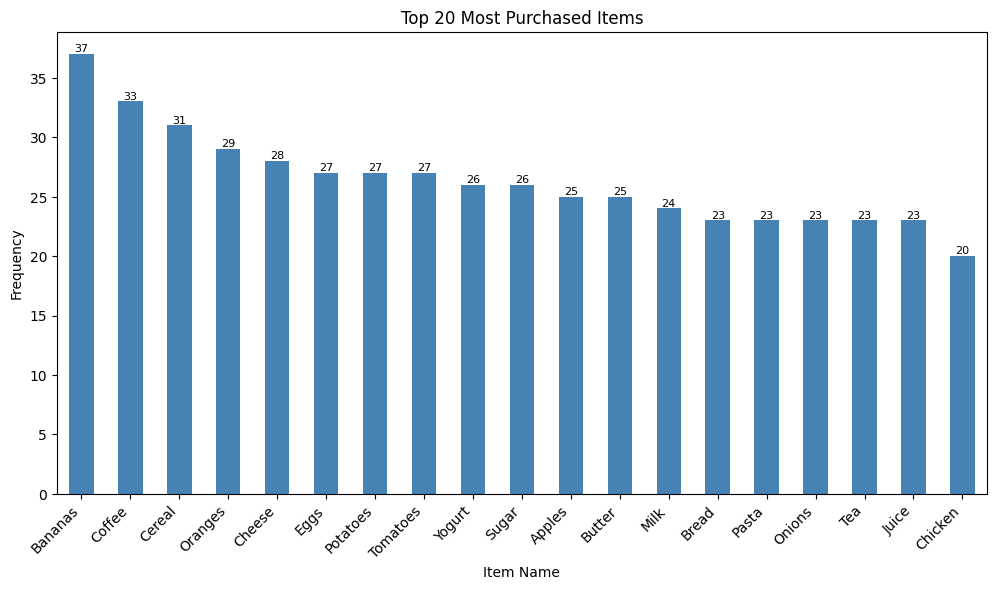

In [8]:
# Top 20 Most Purchased Items
plt.figure(figsize=(12, 6))
top_items = transaction_data['Itemname'].value_counts().head(20)
top_items.plot(kind='bar', color='steelblue')
plt.title('Top 20 Most Purchased Items')
plt.xlabel('Item Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add numbers at the top of each bar
for i, freq in enumerate(top_items):
    plt.text(i, freq, str(freq), ha='center', va='bottom', fontsize=8)

plt.show()


**Inferences:**
* Bananas were the most frequently purchased item, indicating high demand.
* Coffee and Cereal followed closely behind, suggesting popular breakfast choices.
* Dairy products like Cheese, Eggs, and Yogurt were among the top items, indicating staple purchases.

# Market Basket Analysis

In [9]:
# import necessary libraries
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
# Convert the transaction data into a one-hot encoded format
basket = (transaction_data.groupby(['BillNo', 'Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo'))

basket

Itemname,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
BillNo,,,,,,,,,,,,,,,,,,,
1000,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1008,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0
1011,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,0.0,1.0,5.0,2.0,1.0,2.0,1.0,3.0,4.0,3.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0
1483,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1485,0.0,5.0,4.0,1.0,0.0,0.0,3.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0


In [11]:
# Convert quantity values to binary 
basket_sets = basket.apply(lambda x: x > 0, axis=1)

basket_sets

Itemname,Apples,Bananas,Bread,Butter,Cereal,Cheese,Chicken,Coffee,Eggs,Juice,Milk,Onions,Oranges,Pasta,Potatoes,Sugar,Tea,Tomatoes,Yogurt
BillNo,,,,,,,,,,,,,,,,,,,
1000,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1005,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1008,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
1011,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,False,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,False,True
1483,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1485,False,True,True,True,False,False,True,False,False,True,True,False,True,False,True,False,False,False,False


In [12]:
# Generate frequent itemsets with a minimum support threshold of 0.05
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by lift in descending order and select the top 20
top_rules = rules.sort_values(by='lift', ascending=False).head(20)

# Select the desired columns
selected_columns = ['antecedents', 'consequents', 'support', 'confidence', 'lift']
top_rules_selected = top_rules[selected_columns]

# Display the top 20 rules
print(top_rules_selected)

   antecedents consequents   support  confidence      lift
48     (Pasta)   (Chicken)  0.052288    0.347826  2.660870
49   (Chicken)     (Pasta)  0.052288    0.400000  2.660870
70      (Milk)   (Oranges)  0.078431    0.500000  2.637931
71   (Oranges)      (Milk)  0.078431    0.413793  2.637931
69       (Tea)     (Juice)  0.052288    0.347826  2.313800
68     (Juice)       (Tea)  0.052288    0.347826  2.313800
50  (Potatoes)   (Chicken)  0.052288    0.296296  2.266667
51   (Chicken)  (Potatoes)  0.052288    0.400000  2.266667
29  (Potatoes)     (Bread)  0.058824    0.333333  2.217391
28     (Bread)  (Potatoes)  0.058824    0.391304  2.217391
25    (Coffee)     (Bread)  0.071895    0.333333  2.217391
24     (Bread)    (Coffee)  0.071895    0.478261  2.217391
43    (Cereal)    (Onions)  0.065359    0.322581  2.145863
42    (Onions)    (Cereal)  0.065359    0.434783  2.145863
45    (Cheese)    (Onions)  0.058824    0.321429  2.138199
44    (Onions)    (Cheese)  0.058824    0.391304  2.1381

* **Support:** Support is a measure of how frequently a particular itemset (combination of items) appears in the dataset.
* **Confidence:** The likelihood that customers who buy one item (antecedent) will also buy another item (consequent).
* **Lift:** The ratio of the observed support of an itemset to the expected support if the items were independent.

Top 3 association based on LIFT:

* Pasta & Chicken : Customers who purchase Pasta are 2.66 times more likely to purchase Chicken, and vice versa.

* Milk & Oranges : Customers who purchase Milk are 2.64 times more likely to purchase Oranges, and vice versa.

* Tea & Juice : Customers who purchase Tea are 2.31 times more likely to purchase Juice, and vice versa.



Even though customers often buy related items together, it's still a good idea to keep them close by for some important reasons.

* **Convenience:** Placing related products together makes it more convenient for customers to find and purchase them, enhancing the overall shopping experience and reducing the time spent searching for related items.

* **Impulse Purchases:** The presence of related items nearby may prompt impulse purchases, as customers may be reminded to purchase complementary products when they see them displayed together.

* **Cross-Selling Opportunities:** Displaying strongly associated products together allows retailers to capitalize on cross-selling opportunities and encourage customers to explore complementary products they may not have considered otherwise.

* **Enhanced Visibility:** Keeping related products together increases their visibility, ensuring that customers are aware of the full range of options available, leading to increased sales and a more efficient use of shelf space.

* **Customer Experience:** Creating a cohesive shopping experience where related products are grouped together can enhance customer satisfaction and loyalty by demonstrating that the retailer understands their needs and preferences.

These benefits contribute to a more seamless and enjoyable shopping experience for customers while also maximizing sales opportunities for retailers.

https://hbr.org/2007/02/understanding-customer-experience